<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 2*

# üìù Assignment
---
# Data Wrangling


### 1) ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ïó¨Îü¨Î∂ÑÏùò Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Îç∞Ïù¥ÌÑ∞Î•º Îû≠Í∏ÄÎßÅ ÌïòÏÑ∏Ïöî
- Ïó¨Îü¨Î∂ÑÏù¥ ÏÑ†ÌÉùÌïú Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ Îû≠Í∏ÄÎßÅÌïòÏó¨ Î™®Îç∏ÏùÑ ÎßåÎì§Í∏∞ ÏúÑÌïú ÌÖåÏù¥Î∏î ÌòïÌÉúÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥ Î≥¥ÏÑ∏Ïöî.
- **Îã§Ïùå Ìï®ÏàòÏùò resultÎ•º ÏôÑÏÑ±ÏãúÌÇ§Í≥† Î¶¨ÌÑ¥Í∞íÏùÑ Ï†úÏ∂úÌïòÏÑ∏Ïöî.**

In [93]:
# ### Ïù¥Í≥≥ÏóêÏÑú Ï†úÏ∂úÌèº Í≥ºÏ†úÎ•º ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî ###
# import pandas as pd
# df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/assignments/purchase_data.csv", sep=",",index_col=0)

# ## Îã§Ïùå result Ìï®Ïàò ÏïàÏóê male, female Î≥ÄÏàòÎ•º Í≥ÑÏÇ∞ÌïòÏÑ∏Ïöî.(groupby, get_groupÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.)
# ## sum_male: Age = 20, Gender = "Male" Í∑∏Î£πÏùò PriceÎ•º Ìï©ÌïòÏÑ∏Ïöî.
# ## sum_female: Age = 20, Gender = "Female" Í∑∏Î£πÏùò PriceÎ•º Ìï©ÌïòÏÑ∏Ïöî.

# def result(df):

#     sum_male = df[df.Age == 20].groupby('Gender')['Price'].sum().loc['Male']
#     sum_female = df[df.Age == 20].groupby('Gender')['Price'].sum().loc['Female']

#     print("sum_male: {}, sum_female: {}".format(sum_male, sum_female))
#     return round(sum_male + sum_female)

# result(df)

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import randint, uniform

In [95]:
# ÏûêÎ£å Ï∂úÏ≤ò : ÏÑúÏö∏ Ïó¥Î¶∞Îç∞Ïù¥ÌÑ∞ Í¥ëÏû• - ÏÑúÏö∏ÌäπÎ≥ÑÏãú Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Ï†ïÎ≥¥
# https://data.seoul.go.kr/dataList/OA-15548/S/1/datasetView.do

df = pd.read_csv('https://docs.google.com/uc?export=download&id=1WyeDe2Ry4ohJobcbnQJXHxFEAtcg-CC_', encoding='cp949')

# ÏÑúÏö∏ Î∂ÄÎèôÏÇ∞ Î¨ºÍ±¥Í∏àÏï° ÏòàÏ∏°Ìï¥Î≥¥Í∏∞
# 1) Í∞ÄÍ≤© ÏòàÏ∏°
# 2) Í≥†Í∞Ä Ï£ºÌÉù(9Ïñµ Ï¥àÍ≥º)Í≥º Í≥†Í∞Ä Ï£ºÌÉù ÏïÑÎãå Í≤ÉÏúºÎ°ú Î∂ÑÎ•ò(Î¨ºÍ±¥Í∞ÄÍ≤©ÏúºÎ°ú ÌäπÏÑ± ÎßåÎì† ÌõÑ Î¨ºÍ±¥Í∏àÏï° ÌäπÏÑ± Ï†úÍ±∞Î•º ÌÜµÌï¥ Ï†ïÎ≥¥ ÎàÑÏàò ÏòàÎ∞©ÌïòÍ∏∞)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [96]:
# Îç∞Ïù¥ÌÑ∞ ÎÇ¥Ïö©Î¨º Í∞ÑÎã®ÌïòÍ≤å ÌôïÏù∏ÌïòÍ∏∞
df.head()

Ïã§Í±∞ÎûòÍ∞ÄÏïÑÏù¥Îîî                 ÏßÄÎ≤àÏΩîÎìú  ...    Í±¥Ï∂ïÎÖÑÎèÑ          Í±¥Î¨ºÎ™Ö
0  11290-2020-4-0000066-1  1129013800101440024  ...     0.0  ÎûòÎØ∏Ïïà Ïû•ÏúÑÌè¨Î†àÏπ¥Ïö¥Ìã∞
1  11290-2020-4-0000628-1  1129013400105080016  ...     0.0   Î°ØÎç∞Ï∫êÏä¨ ÌÅ¥ÎùºÏãúÏïÑ 
2  11530-2020-4-0014284-1  1153010200107400029  ...  1994.0       Í∂ÅÏ†ÑÏïÑÌä∏ÎπåÎùº
3  11170-2020-4-0005040-1  1117011500101930000  ...  2001.0        Î¶¨Î≤ÑÌûêÏÇºÏÑ±
4  11170-2020-4-0001553-1  1117012900101930003  ...  1971.0           Í∞ïÎ≥Ä

[5 rows x 19 columns]

In [97]:
df.columns

Index(['Ïã§Í±∞ÎûòÍ∞ÄÏïÑÏù¥Îîî', 'ÏßÄÎ≤àÏΩîÎìú', 'ÏãúÍµ∞Íµ¨ÏΩîÎìú', 'ÏûêÏπòÍµ¨Î™Ö', 'Î≤ïÏ†ïÎèôÏΩîÎìú', 'Î≤ïÏ†ïÎèôÎ™Ö', 'Ïã†Í≥†ÎÖÑÎèÑ', 'ÏóÖÎ¨¥Íµ¨Î∂ÑÏΩîÎìú',
       'ÏóÖÎ¨¥Íµ¨Î∂Ñ', 'Î¨ºÍ±¥Î≤àÌò∏', 'ÎåÄÏßÄÍ∂åÎ©¥Ï†Å', 'Í±¥Î¨ºÎ©¥Ï†Å', 'Í¥ÄÎ¶¨Íµ¨Î∂ÑÏΩîÎìú', 'Ï∏µÏ†ïÎ≥¥', 'Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú', 'Í±¥Î¨ºÏ£ºÏö©ÎèÑ',
       'Î¨ºÍ±¥Í∏àÏï°', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Í±¥Î¨ºÎ™Ö'],
      dtype='object')

In [98]:
print(df.shape)
df.isna().sum()

(176001, 19)


Ïã§Í±∞ÎûòÍ∞ÄÏïÑÏù¥Îîî        0
ÏßÄÎ≤àÏΩîÎìú           0
ÏãúÍµ∞Íµ¨ÏΩîÎìú          0
ÏûêÏπòÍµ¨Î™Ö           0
Î≤ïÏ†ïÎèôÏΩîÎìú          0
Î≤ïÏ†ïÎèôÎ™Ö           0
Ïã†Í≥†ÎÖÑÎèÑ           0
ÏóÖÎ¨¥Íµ¨Î∂ÑÏΩîÎìú         0
ÏóÖÎ¨¥Íµ¨Î∂Ñ           0
Î¨ºÍ±¥Î≤àÌò∏           0
ÎåÄÏßÄÍ∂åÎ©¥Ï†Å      86854
Í±¥Î¨ºÎ©¥Ï†Å           0
Í¥ÄÎ¶¨Íµ¨Î∂ÑÏΩîÎìú         0
Ï∏µÏ†ïÎ≥¥        12163
Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú        0
Í±¥Î¨ºÏ£ºÏö©ÎèÑ          0
Î¨ºÍ±¥Í∏àÏï°           0
Í±¥Ï∂ïÎÖÑÎèÑ         565
Í±¥Î¨ºÎ™Ö        12163
dtype: int64

In [99]:
df[df['Ï∏µÏ†ïÎ≥¥'].isna()]['Í±¥Î¨ºÏ£ºÏö©ÎèÑ'].unique()

array(['Îã®ÎèÖÏ£ºÌÉù'], dtype=object)

In [100]:
print(df[df['Í±¥Î¨ºÏ£ºÏö©ÎèÑ'] == 'Îã®ÎèÖÏ£ºÌÉù']['Ï∏µÏ†ïÎ≥¥'].unique())
print(df[df['Í±¥Î¨ºÏ£ºÏö©ÎèÑ'] == 'Îã®ÎèÖÏ£ºÌÉù']['Í±¥Î¨ºÎ™Ö'].unique())

[nan]
[nan]


In [101]:
df['Ï∏µÏ†ïÎ≥¥'].unique()
# Ï∏µÏ†ïÎ≥¥Í∞Ä -1, -2, -3Ïù∏ Í≤ΩÏö∞Í∞Ä ÏûàÎã§
# -1ÏùÄ Î∞òÏßÄÌïòÏùºÍπå? Í∑∏Îüº -2ÏôÄ -3ÏùÄ ÎèÑÎåÄÏ≤¥ Î¨¥ÏóáÏù∏Í∞Ä? ÌôïÏù∏Ïù¥ ÌïÑÏöîÌïòÎã§

array([ 5., 18.,  1.,  2.,  9.,  3.,  4., 10., nan, 16., 12.,  7., 14.,
       23.,  8.,  6., 11., 17., 15., 13., -1., 21., 19., 22., 20., 40.,
       24., 29., 26., 25., 28., 43., 34., 30., 33., 27., 36., 35., 39.,
       32., 31., 37., 38., 42., 45., 41., 44., -3., 54., 47., 61., 51.,
       48., 59., 53., 55., 49., 58., 67., 66., 46., 50., 63., -2., 60.])

In [102]:
df[df['Ï∏µÏ†ïÎ≥¥'] < 0]['Í±¥Î¨ºÏ£ºÏö©ÎèÑ'].unique()
# Î∞òÏßÄÌïò ÌòπÏùÄ Í∑∏ Î∞ë(?)ÏúºÎ°ú Î≥¥Ïù¥Îäî Í≤ΩÏö∞Îäî Ïó∞Î¶ΩÏ£ºÌÉù ÎòêÎäî ÏïÑÌååÌä∏ÎøêÏûÑ

array(['Ïó∞Î¶ΩÏ£ºÌÉù', 'ÏïÑÌååÌä∏'], dtype=object)

In [103]:
# Î∞òÏßÄÌïòÏùº ÏàòÎèÑ ÏûàÎäî -1 Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥Í∏∞
df[df['Ï∏µÏ†ïÎ≥¥'].isin([-1])]

Ïã§Í±∞ÎûòÍ∞ÄÏïÑÏù¥Îîî                 ÏßÄÎ≤àÏΩîÎìú  ...    Í±¥Ï∂ïÎÖÑÎèÑ          Í±¥Î¨ºÎ™Ö
83      11170-2020-4-0004295-1  1117011900100020038  ...  1997.0       Ï§ëÏïôÍ∑∏Î¶∞ÎπåÎùº
100     11200-2020-4-0004008-1  1120011100113440099  ...  2000.0    (1344-99)
106     11200-2020-4-0004821-1  1120011500103020015  ...  1977.0     (302-15)
176     11215-2020-4-0003674-1  1121510300100450014  ...  2005.0  Ìë∏Î•∏ÎπåÎùº(45-14)
205     11170-2020-4-0005678-1  1117013100106160002  ...  1993.0      (616-2)
...                        ...                  ...  ...     ...          ...
175819  11440-2020-4-0016232-1  1144012500100490012  ...  1991.0        ÌïúÎùºÎπåÎ¶¨ÏßÄ
175846  11440-2020-4-0016298-1  1144012300104110002  ...  1991.0         Î™©ÌôîÎß®ÏÖò
175883  11440-2020-4-0016377-1  1144012500106170007  ...  1992.0         ÎèôÏö∞ÎπåÎùº
175900  11440-2020-4-0016406-1  1144012500102750049  ...  1989.0     ÎèôÏÇºÎπåÎùºÌÉÄÏö¥4Îèô
175949  11440-2020-4-0016513-1  1144012500102000129  ...  2001.0        ÌïúÏö∞Î¶¨ÎπåÎùº

[4407 rows x 19 columns]

In [104]:
df[df['Ï∏µÏ†ïÎ≥¥'].isin([-2, -3])]

Ïã§Í±∞ÎûòÍ∞ÄÏïÑÏù¥Îîî                 ÏßÄÎ≤àÏΩîÎìú  ...    Í±¥Ï∂ïÎÖÑÎèÑ                 Í±¥Î¨ºÎ™Ö
24321   11590-2020-4-0013015-1  1159010500103410000  ...  2019.0             ÏïÑÌÅ¨Î°úÎ¶¨Î≤ÑÌïòÏûÑ
62379   11200-2020-4-0007147-1  1120011300105280000  ...  2016.0     Ïò•ÏàòÌååÌÅ¨ÌûêÏä§101Îèô~116Îèô
62694   11200-2020-4-0007966-1  1120011300105280000  ...  2016.0     Ïò•ÏàòÌååÌÅ¨ÌûêÏä§101Îèô~116Îèô
69845   11170-2020-4-0009278-1  1117013100107770011  ...  2005.0            (777-11)
79662   11290-2020-4-0012423-1  1129013400112870001  ...  2019.0            Î°ØÎç∞Ï∫êÏä¨Í≥®Îì†ÌûêÏä§
110462  11380-2020-4-0005912-1  1138011400100840000  ...  2010.0  ÏùÄÌèâÎâ¥ÌÉÄÏö¥ Ïö∞Î¨ºÍ≥®(ÎëêÏÇ∞ÏúÑÎ∏å7Îã®ÏßÄ)
113377  11380-2020-4-0010993-1  1138011400100840000  ...  2010.0  ÏùÄÌèâÎâ¥ÌÉÄÏö¥ Ïö∞Î¨ºÍ≥®(ÎëêÏÇ∞ÏúÑÎ∏å7Îã®ÏßÄ)
114614  11380-2020-4-0013291-1  1138011400100840000  ...  2010.0  ÏùÄÌèâÎâ¥ÌÉÄÏö¥ Ïö∞Î¨ºÍ≥®(ÎëêÏÇ∞ÏúÑÎ∏å7Îã®ÏßÄ)
138205  11500-2020-4-0009071-1  1150010300101540009  ...  1995.0                ÌôçÏùµÎπåÎùº
139297  11500-2020-4-0010968-1  1150010300101540009  ...  1995.0                ÌôçÏùµÎπåÎùº
150826  11530-2020-4-0008791-1  1153011100102810000  ...  2014.0           Ï≤úÏôïÏó∞ÏßÄÌÉÄÏö¥2Îã®ÏßÄ

[11 rows x 19 columns]

In [105]:
# Ï∏µÏ†ïÎ≥¥ -1Ïù∏ Í≤ΩÏö∞Îäî Ïã§Ï†úÎ°ú Î∞òÏßÄÌïòÏùº ÏàòÎèÑ ÏûàÍ≤†ÏúºÎÇò, Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÍ∞Ä Ï†ÑÏ≤¥Ïùò ÏïΩ 3% ÏàòÏ§ÄÏù¥Îùº ÏòÅÌñ•Ïù¥ ÌÅ¨ÏßÄ ÏïäÎã§Í≥† ÌåêÎã®Ìï®
# Ï∏µÏ†ïÎ≥¥ -2, -3Ïù∏ Í≤ΩÏö∞Îäî Î∂ÄÌò∏ ÌëúÍ∏∞Í∞Ä Î∞òÎåÄÎ°ú Îêú Í≤ÉÏúºÎ°ú ÌåêÎã®Ìï®
# Îî∞ÎùºÏÑú ÏùåÏàòÏù∏ Ï∏µÏ†ïÎ≥¥Îäî ÏñëÏàòÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏúºÎ°ú Ï≤òÎ¶¨
tmp_idx = df[df['Ï∏µÏ†ïÎ≥¥'] < 0]['Ï∏µÏ†ïÎ≥¥'].index
df.loc[tmp_idx, ['Ï∏µÏ†ïÎ≥¥']] = df[df['Ï∏µÏ†ïÎ≥¥'] < 0]['Ï∏µÏ†ïÎ≥¥'].mul(-1)
df['Ï∏µÏ†ïÎ≥¥'].unique()

array([ 5., 18.,  1.,  2.,  9.,  3.,  4., 10., nan, 16., 12.,  7., 14.,
       23.,  8.,  6., 11., 17., 15., 13., 21., 19., 22., 20., 40., 24.,
       29., 26., 25., 28., 43., 34., 30., 33., 27., 36., 35., 39., 32.,
       31., 37., 38., 42., 45., 41., 44., 54., 47., 61., 51., 48., 59.,
       53., 55., 49., 58., 67., 66., 46., 50., 63., 60.])

In [106]:
df[df['Í±¥Ï∂ïÎÖÑÎèÑ'].isna()]['Í±¥Î¨ºÏ£ºÏö©ÎèÑ'].unique()

array(['Ïò§ÌîºÏä§ÌÖî', 'Îã®ÎèÖÏ£ºÌÉù', 'Ïó∞Î¶ΩÏ£ºÌÉù'], dtype=object)

In [107]:
df['Í±¥Î¨ºÏ£ºÏö©ÎèÑ'].value_counts()

ÏïÑÌååÌä∏     88553
Ïó∞Î¶ΩÏ£ºÌÉù    60351
Ïò§ÌîºÏä§ÌÖî    14934
Îã®ÎèÖÏ£ºÌÉù    12163
Name: Í±¥Î¨ºÏ£ºÏö©ÎèÑ, dtype: int64

In [108]:
print(df['ÏóÖÎ¨¥Íµ¨Î∂Ñ'].unique())
print(df['ÏóÖÎ¨¥Íµ¨Î∂ÑÏΩîÎìú'].unique())
print(df['Î¨ºÍ±¥Î≤àÌò∏'].unique())

['Ïã†Í≥†']
[4]
[  1  49  10  12   3   4   5   2 100 101 102 103 104 105 106 107 108  11
  13  14  15  16  17  18  19  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  50
  51  52  53  54  55  56  57  58  59   6  60  61  62  63  64  65  66  67
  68  69   7  70  71  72  73  74  75  76  77  78  79   8  80  81  82  83
  84  85  86  87  88   9  90  91  92  93  94  95  96  97  98  99  20  89
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 147 148 149 150 146 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175]


In [109]:
print(df['Í¥ÄÎ¶¨Íµ¨Î∂ÑÏΩîÎìú'].unique())

['2' '0' 'B' '1' 'A']


In [110]:
print(df['Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú'].unique())
print(df['Í±¥Î¨ºÏ£ºÏö©ÎèÑ'].unique())

[ 2001  2002 14202  1001]
['ÏïÑÌååÌä∏' 'Ïó∞Î¶ΩÏ£ºÌÉù' 'Ïò§ÌîºÏä§ÌÖî' 'Îã®ÎèÖÏ£ºÌÉù']


In [111]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Î∞è Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞ÌïòÍ∏∞

# Ï∏µÏ†ïÎ≥¥ÏôÄ Í±¥Î¨ºÎ™ÖÏù¥ ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Îäî Î™®Îëê Îã®ÎèÖÏ£ºÌÉùÏù¥ÎØÄÎ°ú Ï∏µÏ†ïÎ≥¥Îäî 2Î°ú ÎåÄÏ≤¥
# (Í±¥Ï∂ïÎ≤ï ÏÉÅ Îã®ÎèÖÏ£ºÌÉù(Îã®ÎèÖÏ£ºÌÉù/Îã§Ï§ëÏ£ºÌÉù/Îã§Í∞ÄÍµ¨Ï£ºÌÉù)ÏùÄ 3Í∞ú Ï∏µ Ïù¥ÌïòÎ°ú Ï†úÌïúÎêòÏñ¥ ÏûàÏùå -> 1~3Ïùò Ï§ëÍ∞ÑÍ∞íÏù∏ 2Î°ú ÎåÄÏ≤¥)
# Ï∞∏Í≥† : https://justdim.tistory.com/146
df['Ï∏µÏ†ïÎ≥¥'] = df['Ï∏µÏ†ïÎ≥¥'].fillna(2)

# Í±¥Ï∂ïÎÖÑÎèÑÍ∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Îäî ÏàòÍ∞Ä Ï†ÅÏúºÎØÄÎ°ú Ï†úÍ±∞
df = df[~df['Í±¥Ï∂ïÎÖÑÎèÑ'].isna()]

In [112]:
# # ÎåÄÏßÄÍ∂åÎ©¥Ï†ÅÏùÄ Í≤∞Ï∏°ÏπòÍ∞Ä ÎåÄÎã§ÏàòÏù¥ÎØÄÎ°ú Ï†úÍ±∞
# # Ï∞∏Í≥† : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=ctrfindit&logNo=221272287733
# df = df.drop('ÎåÄÏßÄÍ∂åÎ©¥Ï†Å', axis=1)

# # Ïã§Ï†úÎ°ú Í±¥Î¨ºÎ™ÖÏù¥ Í∞ÄÍ≤©Ïóê ÏòÅÌñ•ÏùÑ Ï§Ñ Í≤ÉÏù¥ÎùºÎäî Ïã¨Ï¶ùÏù¥ ÏûàÏúºÎÇò(Î∏åÎûúÎìú Í∞ÄÏπò Îì±Ïùò Ïù¥Ïú†),
# # ÌòÑÏû¨Î°úÏÑúÎäî Ï≤òÎ¶¨Ìï† Î∞©Î≤ïÏùÑ Î™®Î•¥Í∏∞ ÎïåÎ¨∏Ïóê Í±¥Î¨ºÎ™Ö Ïª¨ÎüºÏùÄ Ï†úÍ±∞
# df = df.drop('Í±¥Î¨ºÎ™Ö', axis=1)

# # Ïã§Í±∞ÎûòÍ∞ÄÏïÑÏù¥ÎîîÎäî Í±∞Îûò ÏûêÏ≤¥Ïùò Í≥†Ïú† Î≤àÌò∏Ïù¥ÎØÄÎ°ú Í∞ÄÍ≤©Í≥º Í¥ÄÎ†®ÏóÜÎã§Í≥† ÌåêÎã®ÌïòÏó¨ Ïª¨Îüº Ï†úÍ±∞
# df = df.drop('Ïã§Í±∞ÎûòÍ∞ÄÏïÑÏù¥Îîî', axis=1)

# # Î≤ïÏ†ïÎèôÏΩîÎìúÎäî ÏßÄÎ≤àÏΩîÎìúÏóêÏÑú 'ÌïÑÏßÄÍµ¨Î∂Ñ(1)+Î≥∏Î≤à(4)+Î∂ÄÎ≤à(4)'ÏùÑ Ï†úÏô∏Ìïú Í≤ÉÏúºÎ°úÏÑú, ÏßÄÎ≤àÏΩîÎìúÍ∞Ä ÎÇ¥Ïö© Î∞òÏòÅ Í∞ÄÎä•ÌïòÎã§Í≥† Î¥Ñ
# # Îî∞ÎùºÏÑú Î≤ïÏ†ïÎèôÏΩîÎìú Ïª¨Îüº Ï†úÍ±∞. ÏãúÍµ∞Íµ¨ÏΩîÎìúÎèÑ ÏßÄÎ≤àÏΩîÎìúÏóê Ìè¨Ìï®ÎêòÎØÄÎ°ú Ïª¨Îüº Ï†úÍ±∞.
# # ÏûêÏπòÍµ¨Î™Ö, Î≤ïÏ†ïÎèôÎ™Ö ÎòêÌïú ÏßÄÎ≤àÏΩîÎìúÍ∞Ä Î™®Îëê Î∞òÏòÅÌïòÎØÄÎ°ú Ïª¨Îüº Ï†úÍ±∞
# # Ï∞∏Í≥† : https://zelkun.tistory.com/entry/%EB%B2%95%EC%A0%95%EB%8F%99%ED%96%89%EC%A0%95%EB%8F%99-%EC%B0%A8%EC%9D%B4%EC%A0%90-%EB%B0%8F-%EA%B5%AC%EB%B3%84%ED%98%84%ED%99%A9
# df = df.drop(['Î≤ïÏ†ïÎèôÏΩîÎìú', 'ÏãúÍµ∞Íµ¨ÏΩîÎìú', 'ÏûêÏπòÍµ¨Î™Ö', 'Î≤ïÏ†ïÎèôÎ™Ö'], axis=1)

# # Î™®Îì† Îç∞Ïù¥ÌÑ∞Í∞Ä 2020ÎÖÑÏóê Ïã†Í≥†Îêú Í±∞Îûò Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú Ïã†Í≥†ÎÖÑÎèÑÎäî Î∂àÌïÑÏöîÌï®. Ïª¨Îüº Ï†úÍ±∞
# df = df.drop('Ïã†Í≥†ÎÖÑÎèÑ', axis=1)

# # ÏóÖÎ¨¥Íµ¨Î∂Ñ Î™®Îëê 'Ïã†Í≥†'Ïù¥Í≥†, ÏóÖÎ¨¥Íµ¨Î∂ÑÏΩîÎìúÎèÑ Î™®Îëê Ïù¥Ïóê Ìï¥ÎãπÌïòÎäî '4'ÏûÑ
# # Í∑∏ Ïù¥Ï†ÑÏóê Ïª¨Îüº ÏûêÏ≤¥ÎèÑ Î∂àÌïÑÏöîÌïòÎã§Í≥† ÌåêÎã®Ìï®. Îî∞ÎùºÏÑú Ïª¨Îüº Ï†úÍ±∞
# df = df.drop(['ÏóÖÎ¨¥Íµ¨Î∂Ñ', 'ÏóÖÎ¨¥Íµ¨Î∂ÑÏΩîÎìú'], axis=1)

# # Î¨ºÍ±¥Î≤àÌò∏Îäî Í≤ΩÎß§ÏóêÏÑú Í∞Å Î¨ºÍ±¥Ïóê Î∂ôÎäî Î≤àÌò∏Î•º ÏùòÎØ∏Ìï®
# # ÏòàÎ•º Îì§Ïñ¥ Ìïú ÏÇ¨Í±¥Ïóê Ìïú Í∞ú Î¨ºÍ±¥Ïù¥Î©¥ Î¨ºÍ±¥Î≤àÌò∏Îäî 1ÏûÑ.
# # ÏùºÏ¢ÖÏùò Í≥†Ïú† Î≤àÌò∏Ïù¥ÎØÄÎ°ú Î¨ºÍ±¥Í∞ÄÍ≤©Í≥º ÏÉÅÍ¥ÄÏóÜÎã§Í≥† ÌåêÎã®ÌïòÏó¨ Ïª¨Îüº Ï†úÍ±∞
# # Ï∞∏Í≥† : https://m.blog.naver.com/maestron1/221534254422
# df = df.drop('Î¨ºÍ±¥Î≤àÌò∏', axis=1)

# # Í¥ÄÎ¶¨Íµ¨Î∂ÑÏΩîÎìúÎäî Í≥µÍ≥µÍ∏∞Í¥Ä ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏúºÎ°ú Ï∂îÏ†ï
# # ÏûêÏÑ∏Ìïú ÎÇ¥Ïö©ÏùÄ ÌôïÏù∏Ìï† Ïàò ÏóÜÏóàÏùå
# # Î™ÖÏπ≠ÏúºÎ°ú Î≥¥ÏïÑ Î¨ºÍ±¥Í∞ÄÍ≤©Í≥ºÎäî Í¥ÄÎ†®Ïù¥ ÏóÜÎã§Í≥† Î≥¥Í≥† Ïª¨Îüº Ï†úÍ±∞
# df = df.drop('Í¥ÄÎ¶¨Íµ¨Î∂ÑÏΩîÎìú', axis=1)

# # Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìúÍ∞Ä Í±¥Î¨ºÏ£ºÏö©ÎèÑÎ•º Î∞òÏòÅÌïòÍ≥† ÏûàÏúºÎØÄÎ°ú Í±¥Î¨ºÏ£ºÏö©ÎèÑ Ïª¨Îüº Ï†úÍ±∞
# df = df.drop('Í±¥Î¨ºÏ£ºÏö©ÎèÑ', axis=1)

# ÏúÑ Í≥ºÏ†ï ÌïúÍ∫ºÎ≤àÏóê Ï†ïÎ¶¨Ìïú Í≤∞Í≥º Í∞ÄÏ†∏Ïò§Í∏∞
df = df[['ÏßÄÎ≤àÏΩîÎìú',	'Í±¥Î¨ºÎ©¥Ï†Å',	'Ï∏µÏ†ïÎ≥¥',	'Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú',	'Î¨ºÍ±¥Í∏àÏï°',	'Í±¥Ï∂ïÎÖÑÎèÑ']]

In [113]:
df.isna().sum()

ÏßÄÎ≤àÏΩîÎìú       0
Í±¥Î¨ºÎ©¥Ï†Å       0
Ï∏µÏ†ïÎ≥¥        0
Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú    0
Î¨ºÍ±¥Í∏àÏï°       0
Í±¥Ï∂ïÎÖÑÎèÑ       0
dtype: int64

In [114]:
df['Í±¥Ï∂ïÎÖÑÎèÑ'].unique()
# Í±¥Ï∂ïÎÖÑÎèÑÍ∞Ä 0Ïù∏ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§

array([   0., 1994., 2001., 1971., 1982., 1993., 2002., 2017., 2014.,
       1998., 2016., 2000., 2018., 1997., 1986., 2003., 1996., 2013.,
       1970., 2019., 1977., 1989., 2006., 1999., 2007., 1973., 2004.,
       1978., 2008., 1991., 2012., 1990., 1985., 2009., 2015., 1992.,
       2020., 1976., 1995., 1967., 2005., 1983., 1965., 1984., 1987.,
       1958., 2011., 1939., 1980., 2010., 1975., 1961., 1964., 1968.,
       1988., 1981., 1966., 1969., 1948., 1960., 1959., 1974., 1956.,
       1972., 1979., 1957., 1947., 1940., 1955., 1949., 1963., 1962.,
       1954., 1936., 1943., 1944., 2021., 1937., 1935., 1933., 1900.,
       1950., 1941., 1928., 1930., 1929., 1931., 1953., 1932., 1934.,
       1946., 1938., 1901., 1909., 1920., 1923., 1921., 1922., 1952.])

In [115]:
print(df.shape)
len(df[df['Í±¥Ï∂ïÎÖÑÎèÑ'] == 0])

(175436, 6)


1152

In [116]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò 1% ÎØ∏ÎßåÏù¥ÎØÄÎ°ú Ï†úÍ±∞
df = df[df['Í±¥Ï∂ïÎÖÑÎèÑ'] != 0]
len(df[df['Í±¥Ï∂ïÎÖÑÎèÑ'] == 0])

0

In [117]:
# Ïù∏Îç±Ïä§ Ïû¨Ï†ïÎ†¨
df = df.reset_index(drop=True)

df.head()

ÏßÄÎ≤àÏΩîÎìú    Í±¥Î¨ºÎ©¥Ï†Å  Ï∏µÏ†ïÎ≥¥  Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú        Î¨ºÍ±¥Í∏àÏï°    Í±¥Ï∂ïÎÖÑÎèÑ
0  1153010200107400029   36.90  1.0     2001   105000000  1994.0
1  1117011500101930000   59.55  2.0     2001   830000000  2001.0
2  1117012900101930003   64.43  5.0     2001   735000000  1971.0
3  1117013000100220002  105.75  9.0     2001  1430000000  1982.0
4  1117011000100020033   73.04  3.0     2002   400000000  1993.0

### 2) ÏÉàÎ°ú ÌäπÏßïÎì§ÏùÑ ÎßåÎì§Ïñ¥ Î≥¥ÏÑ∏Ïöî
- Ïó¨Îü¨Î∂ÑÏù¥ ÏÑ†ÌÉùÌïú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌäπÏßï Í≥µÌïôÏùÑ ÏàòÌñâÌï¥ Î≥¥ÏÑ∏Ïöî.
- **(Îã§Ï§ëÏÑ†ÌÉù) purchase_dataÎ•º Îû≠Í∏ÄÎßÅÌïòÏó¨ Îã§Ïùå Ï°∞Í±¥ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥† Í≤∞Í≥ºÍ∞Ä Ïò¨Î∞îÎ•∏ Ìï≠Î™©ÏùÑ ÏÑ∏Ïöî.**
    1. ÎÇòÏù¥ 1-20ÏÑ∏ Í∑∏Î£π(20ÏÑ∏ Ìè¨Ìï®)Ïùò ÌèâÍ∑† PriceÎäî 3.101818Ïù¥Îã§.
    2. ÎÇòÏù¥ 21-50ÏÑ∏ Í∑∏Î£πÏùò ÌèâÍ∑† PriceÎäî 3.021559Ïù¥Îã§.
    3. Í∞ÄÏû• ÎßéÏù¥ Íµ¨ÏûÖÌïú ÏïÑÏù¥ÌÖúÏùò IDÎäî 178 Ïù¥Îã§.
    4. ÎëêÎ≤àÏß∏Î°ú Îß§Ï∂úÏùÑ ÎßéÏù¥ ÎÇ∏ ÏïÑÏù¥ÌÖú IDÎäî 145Ïù¥Îã§.

In [118]:
# ### Ïù¥Í≥≥ÏóêÏÑú Ï†úÏ∂úÌèº Í≥ºÏ†úÎ•º ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî ###
# # Í∑∏Î£πÎ≥Ñ Price ÌèâÍ∑†
# df['Age_group'] = df['Age'].apply(lambda x: 'young' if x <= 20 else 'old')
# print(df.groupby('Age_group')['Price'].mean())
# # 1-20 = 3.101818 / 21-50 = 3.021559

# # ÌåêÎß§Ïàò ÏÉÅÏúÑ Item ID
# print(df['Item ID'].value_counts())
# # 1ÏúÑ : 178

# # Îß§Ï∂ú ÏÉÅÏúÑ Item IDs
# df['Sales'] = df['Item ID'].value_counts()[df['Item ID']].reset_index(drop=True) * df['Price']
# df.groupby('Item ID').mean().sort_values(by='Sales', ascending=False)['Sales']
# # Îëê Î≤àÏß∏Î°ú Îß§Ï∂úÏùÑ ÎßéÏù¥ ÎÇ∏ ÏïÑÏù¥ÌÖú ID : 82

In [119]:
df.head()

ÏßÄÎ≤àÏΩîÎìú    Í±¥Î¨ºÎ©¥Ï†Å  Ï∏µÏ†ïÎ≥¥  Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú        Î¨ºÍ±¥Í∏àÏï°    Í±¥Ï∂ïÎÖÑÎèÑ
0  1153010200107400029   36.90  1.0     2001   105000000  1994.0
1  1117011500101930000   59.55  2.0     2001   830000000  2001.0
2  1117012900101930003   64.43  5.0     2001   735000000  1971.0
3  1117013000100220002  105.75  9.0     2001  1430000000  1982.0
4  1117011000100020033   73.04  3.0     2002   400000000  1993.0

In [120]:
# Í±¥Ï∂ïÎÖÑÎèÑÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÍ∏∞Î≥¥Îã§Îäî Î™á ÎÖÑÏù¥ÎÇò Ïò§Îûò ÎêòÏóàÎäîÏßÄ ÎÇòÌÉÄÎÇ¥Îäî Ïª¨ÎüºÏù¥ ÌïÑÏöîÌïòÏßÄ ÏïäÏùÑÍπå?
df['Ïó∞Ïãù'] = (2020 - df['Í±¥Ï∂ïÎÖÑÎèÑ']).astype(int)
df.head()

ÏßÄÎ≤àÏΩîÎìú    Í±¥Î¨ºÎ©¥Ï†Å  Ï∏µÏ†ïÎ≥¥  Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú        Î¨ºÍ±¥Í∏àÏï°    Í±¥Ï∂ïÎÖÑÎèÑ  Ïó∞Ïãù
0  1153010200107400029   36.90  1.0     2001   105000000  1994.0  26
1  1117011500101930000   59.55  2.0     2001   830000000  2001.0  19
2  1117012900101930003   64.43  5.0     2001   735000000  1971.0  49
3  1117013000100220002  105.75  9.0     2001  1430000000  1982.0  38
4  1117011000100020033   73.04  3.0     2002   400000000  1993.0  27

In [121]:
# Í±¥Î¨ºÎ©¥Ï†ÅÏùÑ ÌÜµÌï¥ ÏßëÏùÑ ÏÜåÌòï/Ï§ëÌòï/ÎåÄÌòïÏúºÎ°ú Íµ¨Î∂ÑÌïòÎ©¥ Ïñ¥Îñ®Íπå?
# Í∏∞Ï§Ä : 60„é° Ïù¥Ìïò = ÏÜåÌòï / 60„é° Ï¥àÍ≥º~85„é° Ïù¥Ìïò = Ï§ëÌòï / 85„é° Ï¥àÍ≥º = ÎåÄÌòï
# Ï∞∏Í≥† : https://www.hani.co.kr/arti/economy/property/689578.html
df['Ï£ºÌÉùÍ∑úÎ™®'] = df['Í±¥Î¨ºÎ©¥Ï†Å'].apply(lambda x: 'S' if x <= 60 else 'L' if x > 85 else 'M')
df.head()

ÏßÄÎ≤àÏΩîÎìú    Í±¥Î¨ºÎ©¥Ï†Å  Ï∏µÏ†ïÎ≥¥  Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú        Î¨ºÍ±¥Í∏àÏï°    Í±¥Ï∂ïÎÖÑÎèÑ  Ïó∞Ïãù Ï£ºÌÉùÍ∑úÎ™®
0  1153010200107400029   36.90  1.0     2001   105000000  1994.0  26    S
1  1117011500101930000   59.55  2.0     2001   830000000  2001.0  19    S
2  1117012900101930003   64.43  5.0     2001   735000000  1971.0  49    M
3  1117013000100220002  105.75  9.0     2001  1430000000  1982.0  38    L
4  1117011000100020033   73.04  3.0     2002   400000000  1993.0  27    M

In [ ]:
# Î¨ºÍ±¥Í∏àÏï° 9Ïñµ Ï¥àÍ≥ºÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í≥†Í∞ÄÏ£ºÌÉùÍ≥º Í≥†Í∞ÄÏ£ºÌÉùÏù¥ ÏïÑÎãå Î¨ºÍ±¥ÏúºÎ°ú Î∂ÑÎ•ò ÏòàÏ∏°ÏùÄ Ïñ¥Îñ®Íπå?
# Ï∞∏Í≥† : https://m.post.naver.com/viewer/postView.nhn?volumeNo=32576102&memberNo=36833282
df['Í≥†Í∞ÄÏ£ºÌÉùÏó¨Î∂Ä'] = df['Î¨ºÍ±¥Í∏àÏï°'].apply(lambda x: 'Y' if x > 900000000)

In [122]:
df.dtypes

ÏßÄÎ≤àÏΩîÎìú        object
Í±¥Î¨ºÎ©¥Ï†Å       float64
Ï∏µÏ†ïÎ≥¥        float64
Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú      int64
Î¨ºÍ±¥Í∏àÏï°         int64
Í±¥Ï∂ïÎÖÑÎèÑ       float64
Ïó∞Ïãù           int64
Ï£ºÌÉùÍ∑úÎ™®        object
dtype: object

In [123]:
# Ï∏µÏ†ïÎ≥¥, Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú, Í±¥Ï∂ïÎÖÑÎèÑÎäî Ïó∞ÏÜçÏ†ÅÏù∏ ÏàòÏπòÌòïÏù¥ ÏïÑÎãå Î≤îÏ£ºÌòïÏúºÎ°ú Í∞ÑÏ£ºÌïòÏó¨ Ïª¨Îüº ÌòïÎ≥ÄÌôò
df[['Ï∏µÏ†ïÎ≥¥', 'Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú', 'Í±¥Ï∂ïÎÖÑÎèÑ']] = df[['Ï∏µÏ†ïÎ≥¥', 'Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú', 'Í±¥Ï∂ïÎÖÑÎèÑ']].astype(str)

df.dtypes

ÏßÄÎ≤àÏΩîÎìú        object
Í±¥Î¨ºÎ©¥Ï†Å       float64
Ï∏µÏ†ïÎ≥¥         object
Í±¥Î¨ºÏ£ºÏö©ÎèÑÏΩîÎìú     object
Î¨ºÍ±¥Í∏àÏï°         int64
Í±¥Ï∂ïÎÖÑÎèÑ        object
Ïó∞Ïãù           int64
Ï£ºÌÉùÍ∑úÎ™®        object
dtype: object

In [124]:
# Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤ΩÌïòÍ∏∞
df.columns = ['addr_code', 'size', 'floor', 'type', 'price', 'built_year', 'years', 'size_grade']
df.head()

addr_code    size floor  ... built_year  years size_grade
0  1153010200107400029   36.90   1.0  ...     1994.0     26          S
1  1117011500101930000   59.55   2.0  ...     2001.0     19          S
2  1117012900101930003   64.43   5.0  ...     1971.0     49          M
3  1117013000100220002  105.75   9.0  ...     1982.0     38          L
4  1117011000100020033   73.04   3.0  ...     1993.0     27          M

[5 rows x 8 columns]

## üî• ÎèÑÏ†ÑÍ≥ºÏ†ú

### 3) Ï°∞Í∏à Î∂ÄÏ°±ÌïòÎçîÎùºÎèÑ ÏµúÏÜåÌïúÏùò Îû≠Í∏ÄÎßÅÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌïòÏó¨ Í∞ÑÎã®Ìïú Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÏºú Î≥¥ÏÑ∏Ïöî
- Ïó¨Îü¨Î∂ÑÎì§Ïù¥ ÏÑ†ÌÉùÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† Í∞ÑÎã®Ìïú Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ≥† Í≤∞Í≥ºÎ•º Î¶¨Ìè¨ÌåÖ Ìï©ÎãàÎã§.

In [125]:
df.describe()

size         price          years
count  174284.000000  1.742840e+05  174284.000000
mean       71.593930  6.253840e+08      18.514918
std        66.307145  6.240576e+08      12.133741
min         5.070000  1.700000e+07      -1.000000
25%        41.220000  2.500000e+08       9.000000
50%        59.760000  4.450000e+08      18.000000
75%        84.820000  8.000000e+08      27.000000
max      2804.970000  2.900000e+10     120.000000

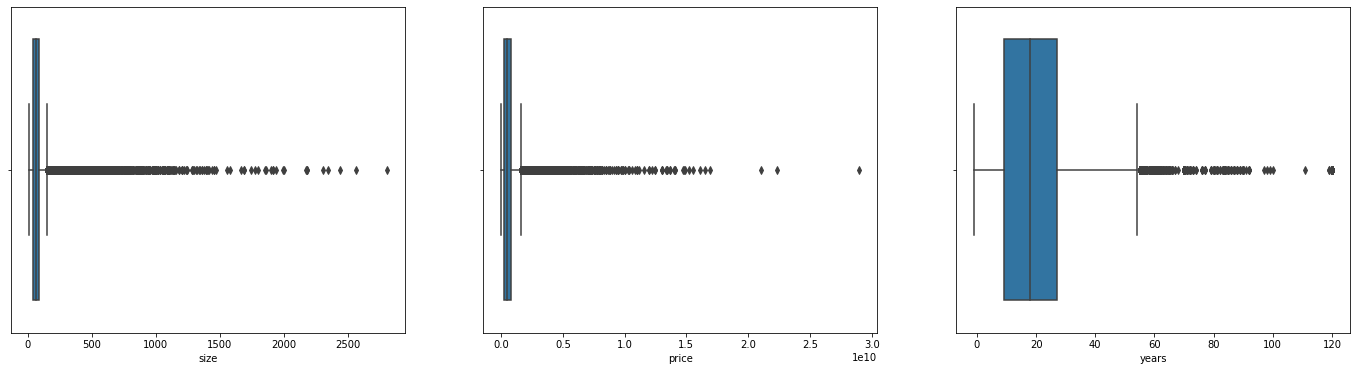

In [126]:
col_list = ['size', 'price', 'years']

def checkOutlier(df, cols):
  fig, axes = plt.subplots(1, 3, figsize=(24, 6))
  for i, col in enumerate(col_list):
    sns.boxplot(x=col, data=df, ax=axes[i])

checkOutlier(df, col_list)

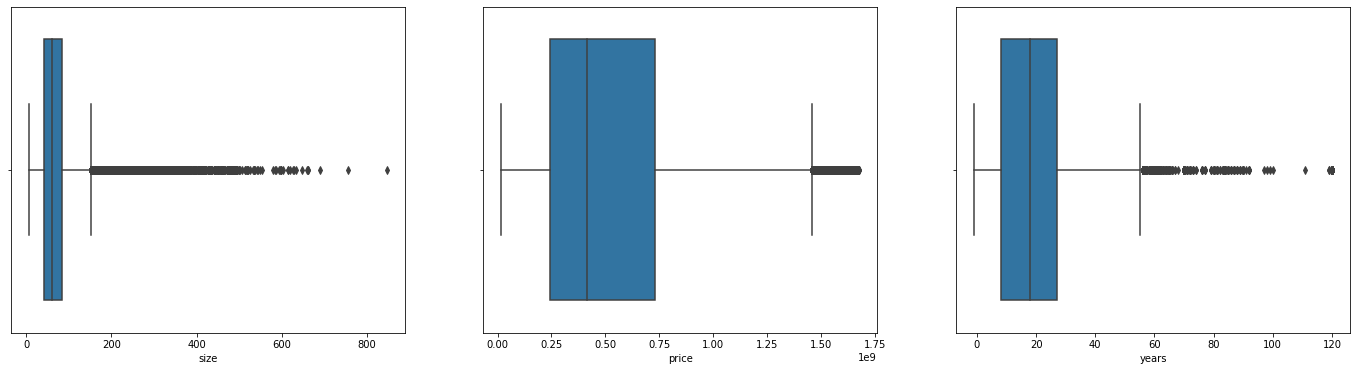

In [127]:
# ÏàòÏπòÌòï Ïª¨Îüº Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ïù¥ÏÉÅÏπòÎ°ú Î≥¥Ïù¥Îäî Í∞íÎì§Ïù¥ Ï°¥Ïû¨Ìï®
# Í∞ÅÍ∞ÅÏóê ÎåÄÌïòÏó¨ ÏÉÅÏúÑ 5%Î•º Ï†úÍ±∞
target = 'price'
df = df[df[target] < np.percentile(df[target], 95)]
checkOutlier(df, col_list)

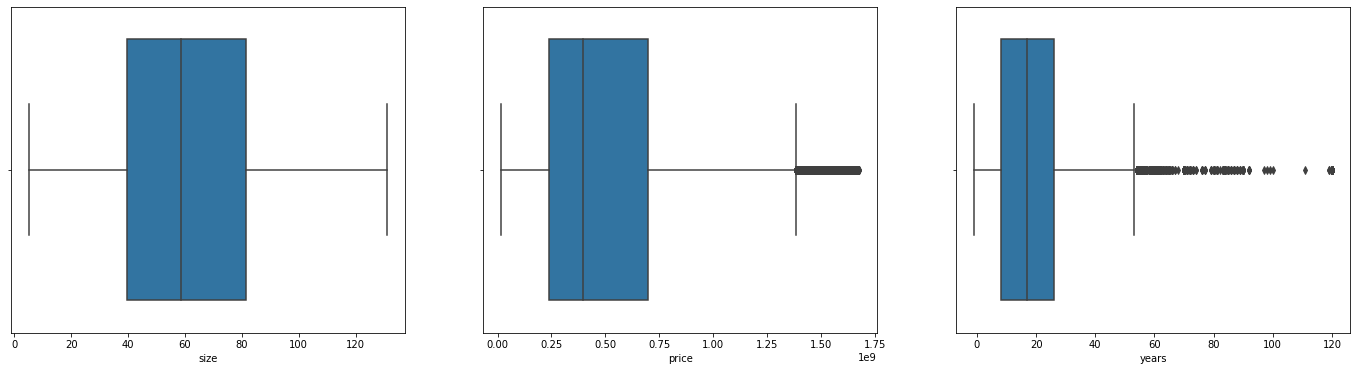

In [128]:
df = df[df['size'] < np.percentile(df['size'], 95)]
checkOutlier(df, col_list)

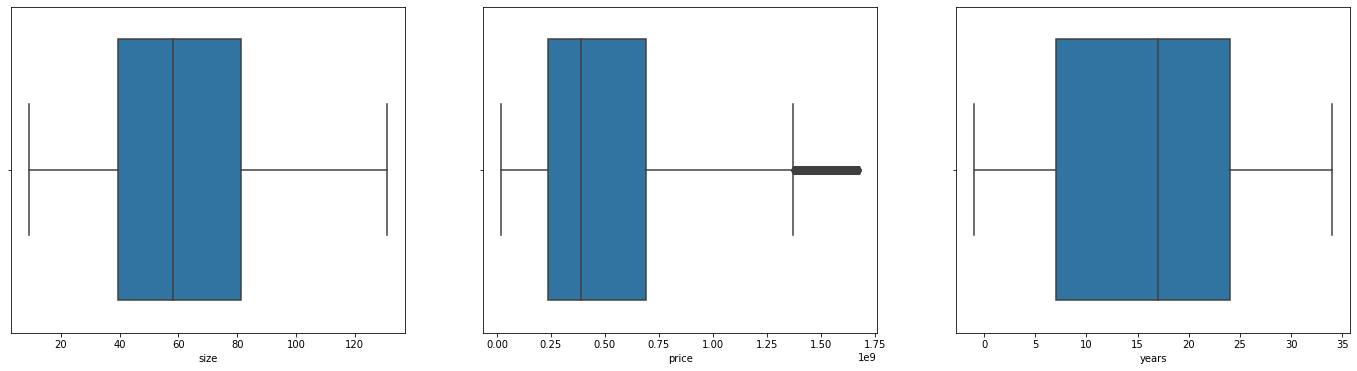

In [130]:
df = df[df['years'] < np.percentile(df['years'], 95)]
checkOutlier(df, col_list)

In [131]:
df.shape

(149177, 8)

In [132]:
# ÌäπÏÑ±Í≥º ÌÉÄÍ≤üÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î≥¥Í∏∞
df.corr()

size     price     years
size   1.000000  0.669845  0.227158
price  0.669845  1.000000  0.039608
years  0.227158  0.039608  1.000000

496022625.40472054


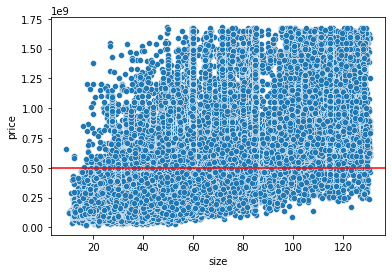

In [136]:
# Í∞ÄÏû• ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Ïò®ÎèÑÏôÄ ÌÉÄÍ≤üÏùò Í¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôîÌï¥Î≥¥Í∏∞
baseline = df.price.mean() # Í∏∞Ï§Ä Î™®Îç∏ : ÌÉÄÍ≤ü(gas_supply)Ïùò ÌèâÍ∑†Í∞í
print(baseline)

sns.scatterplot(x='size', y='price', data=df)
plt.axhline(baseline, color='red'); # Í∏∞Ï§Ä Î™®Îç∏ ÏãúÍ∞ÅÌôî

In [137]:
# Í∏∞Ï§Ä ÏÑ±Îä•
errors = baseline - df.price
baseline_mae = errors.abs().mean()
baseline_mae

274068243.68311477